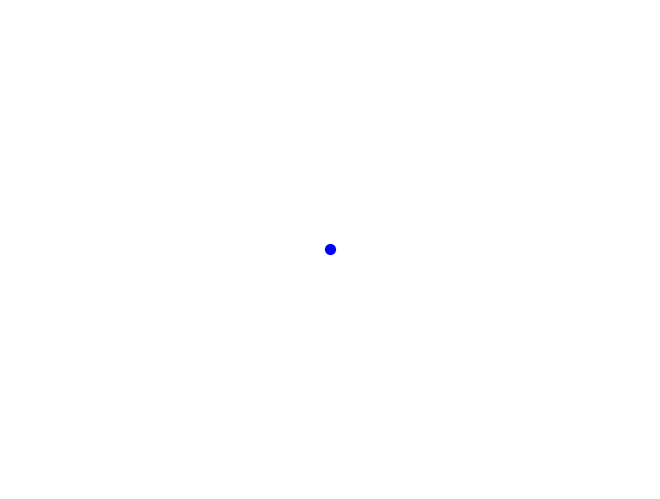

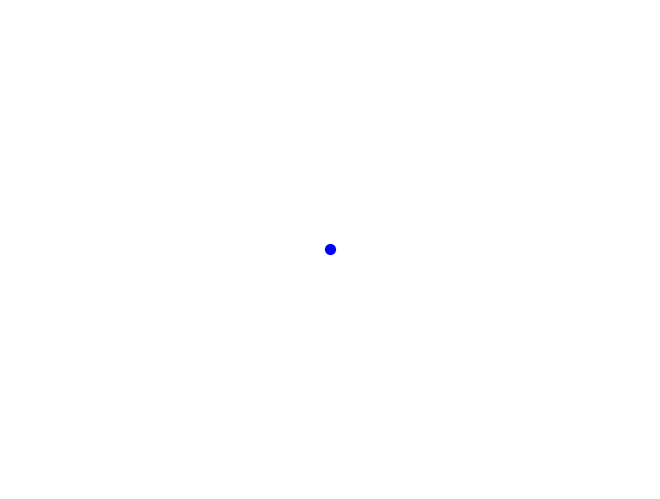

(ordered) position is deprecated.  Please use at()  (deprecated in 6.1, will
be removed in (or after) 7.0) (called from
c:\Users\MLJ\Downloads\H2\regionality and hubs\regions.py:875)
Presolving model
0 rows, 0 cols, 0 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-2); columns 0(-4); elements 0(-3) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  0.0000000000e+00
HiGHS run time      :          0.00
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 0
  Sense: 1
# ------------------------------

AttributeError: 'Model' object has no attribute 'production'

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 11 09:28:58 2024

@author: JNI
"""

import pandas as pd
import random as rnd
import regions


'''
THIS IS A SIMPLE SCRIPT THAT USES A MADE UP DEMAND CURVE TO ITERATE WITH HMM

take the dataframe grid.model.h2_price and input it into the function interchange()
along with the desired number of iterations, and it will pass values back and forth.

'''

grid = regions.Grid(regions.Data())
grid.build_grid()
grid.test()


def demand_curve(h2_price_data, iteration = 1):
    
    h2_price_data['demand_' + str(iteration)] = (1 - h2_price_data['price'] /  (30*1.05**(h2_price_data['year']-2024)))*500000*1.2**(h2_price_data['year']-2024)
    return h2_price_data



def interchange(data, iterations = 1):
    
    data.rename(columns = {'price':'price_0'}, inplace = True)
    
    for iteration in range(iterations):
        data['demand_' + str(iteration)] = (1 - data['price_' + str(iteration)] /  (30*1.05**(data['year']-2024)))*500000*1.1**(data['year']-2024)
        new_demand = {(region,year): data[(data['region'] == region) & (data['year'] == year )].iloc[0]['demand_' + str(iteration)] for region in data['region'].unique().tolist() for year in data['year'].unique().tolist()}
        grid.model.resolve(new_demand)
        data['price_' + str(iteration+1)] = grid.model.h2_price['price']
    
    return data
